<a href="https://colab.research.google.com/github/Arijitdutta19910601/Atmol4Cast-CNR/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
! pip install verstack cartopy xarray openpyxl DateTime pandas numpy matplotlib tensorflow keras scipy

In [4]:
import pandas as pd
import numpy as np

# --- Load ZephIR Wind Lidar Data ---
zephir_df_filtered = pd.read_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2016_2018.xlsx')
#zephir_df_filtered.replace([-999, -9999], np.nan, inplace=True)
Test_df = zephir_df_filtered
print(Test_df.head())

            Timestamp  air_temperature  air_temperature_std  air_pressure  \
0 2016-01-13 12:00:00            15.48                  NaN   1016.400024   
1 2016-01-13 12:10:00            15.75             0.190919   1016.400024   
2 2016-01-13 12:20:00            15.90             0.212838   1016.299988   
3 2016-01-13 12:30:00            15.60             0.182277   1016.400024   
4 2016-01-13 12:40:00            15.18             0.274627   1016.400024   

   air_pressure_std   humidity  humidity_std  height_1  h_1_horizontal_speed  \
0               NaN  56.090000           NaN       300             17.852875   
1          0.000000  55.090000      0.707107       300             17.935825   
2          0.057756  52.000000      2.132143       300             17.989279   
3          0.050018  55.090000      1.775394       300             18.282331   
4          0.044738  56.700001      1.809290       300             18.653624   

   h_1_horizontal_speed_std  ...  h_10_vertical_speed  \

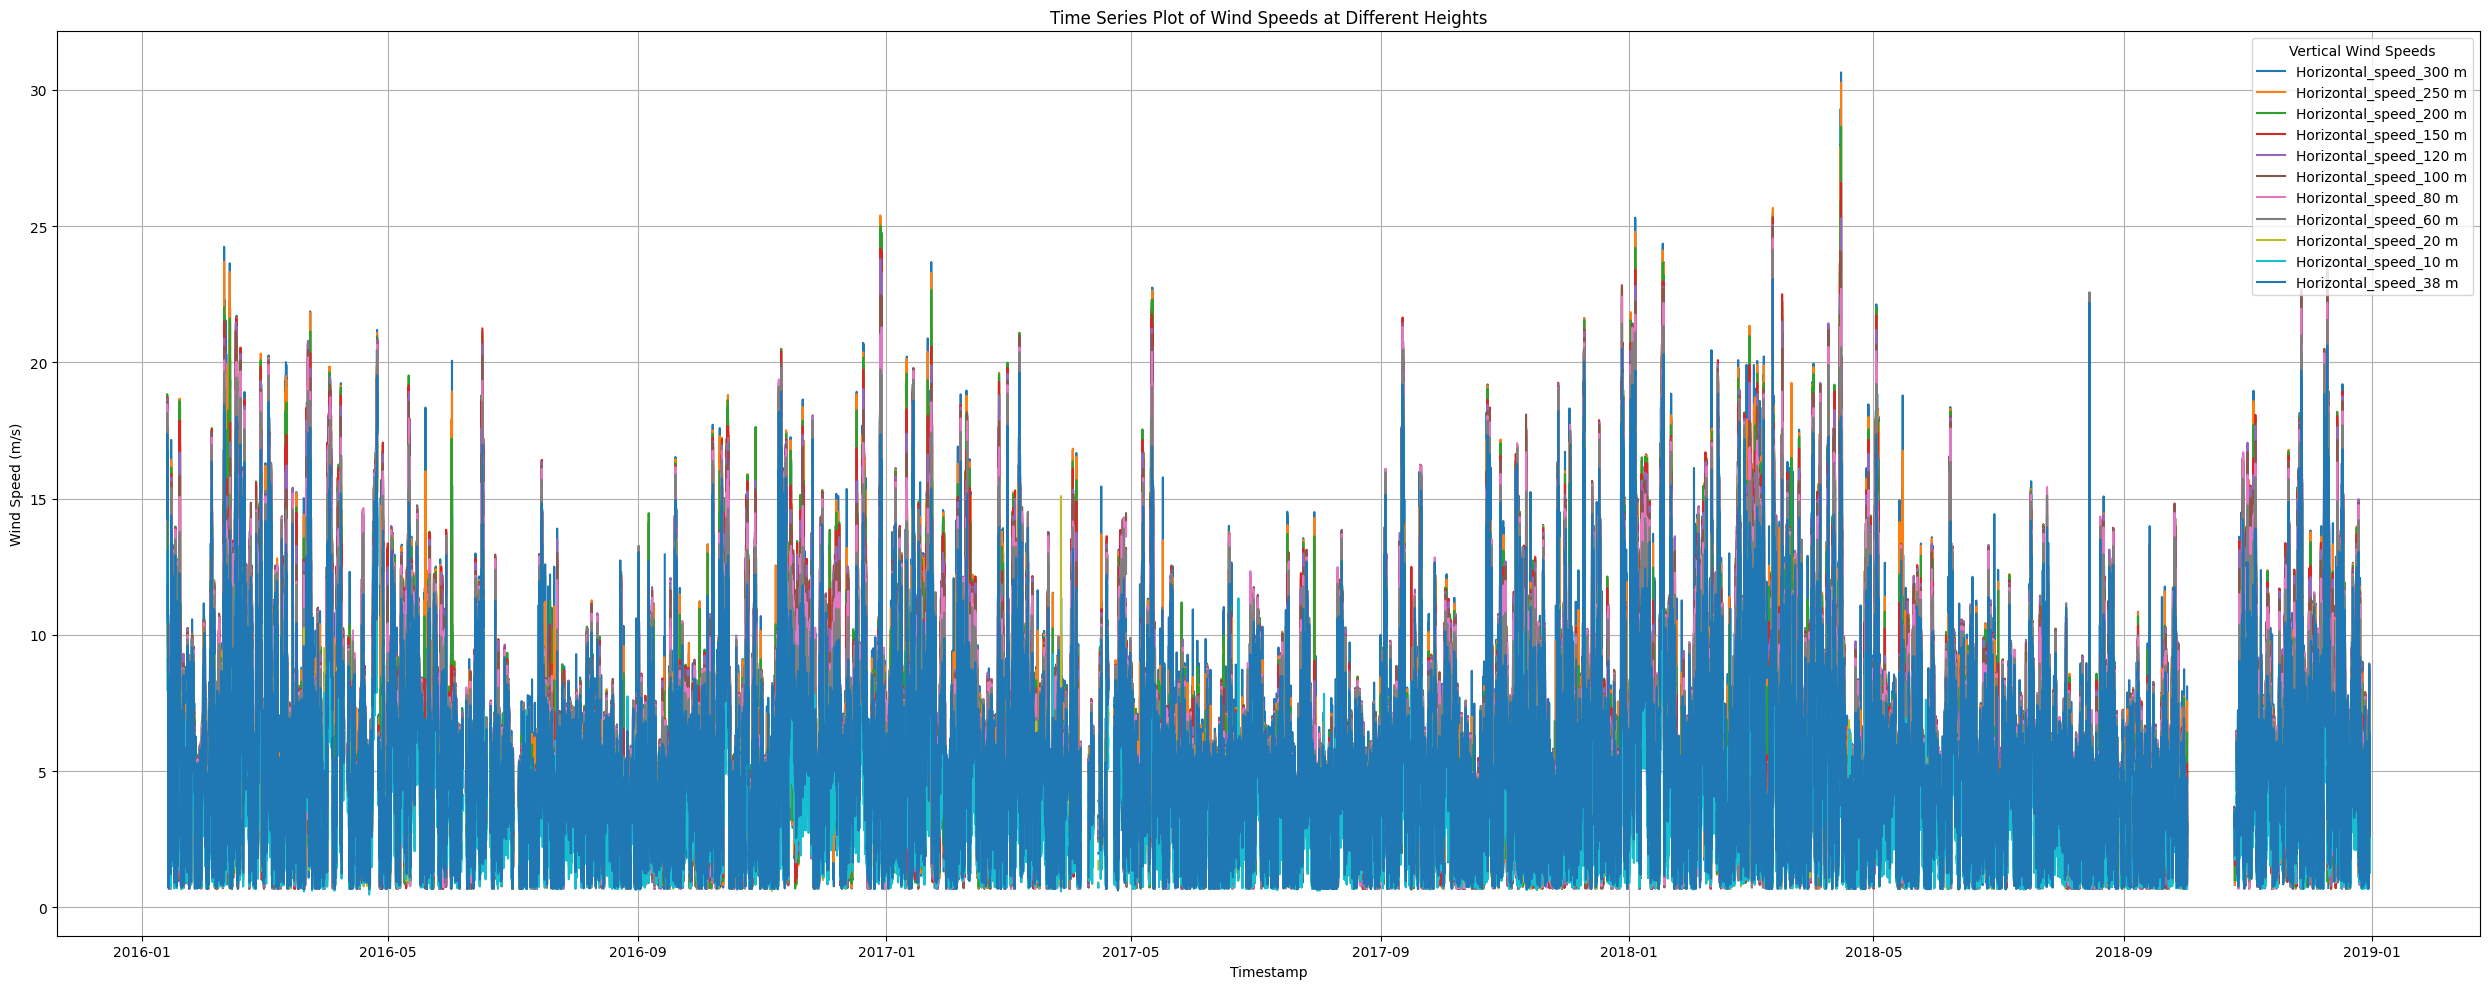

In [3]:
import matplotlib.pyplot as plt

# Define column names
# These are the ORIGINAL names from the Excel file
original_columns = [
    "h_1_horizontal_speed", "h_2_horizontal_speed", "h_3_horizontal_speed",
    "h_4_horizontal_speed", "h_5_horizontal_speed", "h_6_horizontal_speed",
    "h_7_horizontal_speed", "h_8_horizontal_speed", "h_9_horizontal_speed",
    "h_10_horizontal_speed", "h_11_horizontal_speed"
]

# Define the new names after renaming
new_column_names = {
    'h_1_horizontal_speed': 'Horizontal_speed_300 m',
    'h_2_horizontal_speed': 'Horizontal_speed_250 m',
    'h_3_horizontal_speed': 'Horizontal_speed_200 m',
    'h_4_horizontal_speed': 'Horizontal_speed_150 m',
    'h_5_horizontal_speed': 'Horizontal_speed_120 m',
    'h_6_horizontal_speed': 'Horizontal_speed_100 m',
    'h_7_horizontal_speed': 'Horizontal_speed_80 m',
    'h_8_horizontal_speed': 'Horizontal_speed_60 m',
    'h_9_horizontal_speed': 'Horizontal_speed_20 m',
    'h_10_horizontal_speed': 'Horizontal_speed_10 m',
    'h_11_horizontal_speed': 'Horizontal_speed_38 m'
}

# Apply the rename operation
Test_df.rename(columns=new_column_names, inplace=True)

# Now, create the list of columns to plot using the NEW names
columns_to_plot = list(new_column_names.values())

# Plot
plt.figure(figsize=(25, 10))

# Iterate over the NEW column names for plotting
for col in columns_to_plot:
    # Ensure the column exists in the DataFrame after renaming
    if col in Test_df.columns:
         plt.plot(Test_df['Timestamp'], Test_df[col], label=col)
    else:
        print(f"Warning: Column '{col}' not found after renaming.")


plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Time Series Plot of Wind Speeds at Different Heights')
plt.legend(title="Vertical Wind Speeds", loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()